In [ ]:
import os

# Install the Kaggle API client
!pip install -q kaggle

# Create a directory for Kaggle credentials if it doesn't exist
!mkdir -p ~/.kaggle

# Copy the kaggle.json file to the credentials directory
# This assumes kaggle.json has been uploaded to /content/
!cp /content/kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Define dataset identifier and download path
dataset_id = "abhyudaya12/veri-vehicle-re-identification-dataset"
download_path = "/content/veri-vehicle-re-identification-dataset"

# Create the download directory if it doesn't exist
os.makedirs(download_path, exist_ok=True)

# Download the dataset
!kaggle datasets download {dataset_id} -p {download_path}

# Unzip the downloaded dataset
# Assuming the downloaded file is a zip archive in the download_path
# We'll find the first .zip file and unzip it
import zipfile

for file_name in os.listdir(download_path):
    if file_name.endswith('.zip'):
        zip_file_path = os.path.join(download_path, file_name)
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(download_path)
        print(f"Dataset unzipped to: {download_path}")
        # Optionally, remove the zip file after extraction
        # os.remove(zip_file_path)
        break
else:
    print("No zip file found to extract.")

print("Kaggle dataset download and extraction complete.")


Dataset URL: https://www.kaggle.com/datasets/abhyudaya12/veri-vehicle-re-identification-dataset
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
 96% 905M/946M [00:04<00:00, 155MB/s]
100% 946M/946M [00:08<00:00, 122MB/s]
Dataset unzipped to: /content/veri-vehicle-re-identification-dataset
Kaggle dataset download and extraction complete.


In [ ]:
!pip install ultralytics scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.7 MB/s eta 0:00:00


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from collections import defaultdict

VERI_DIR = "/content/veri-vehicle-re-identification-dataset/VeRi"
OUTPUT_DIR = "/content/veri_yolo_cls"
VAL_SPLIT = 0.2

print("Đang chuyển đổi VeRi dataset...")

image_dir = os.path.join(VERI_DIR, "image_train")

# Xóa output cũ
if os.path. exists(OUTPUT_DIR):
    shutil.rmtree(OUTPUT_DIR)

# Tạo thư mục
output_train = os.path.join(OUTPUT_DIR, "train")
output_val = os.path.join(OUTPUT_DIR, "val")
os.makedirs(output_train)
os.makedirs(output_val)

# Nhóm ảnh theo vehicle_id
vehicle_images = defaultdict(list)
jpg_files = [f for f in os.listdir(image_dir) if f.endswith('.jpg')]

for img_name in jpg_files:
    vehicle_id = img_name.split('_')[0]
    vehicle_images[vehicle_id].append(img_name)

print(f"{len(vehicle_images)} vehicles, {len(jpg_files)} ảnh")

# Lọc và chia train/val
vehicle_images = {k: v for k, v in vehicle_images.items() if len(v) >= 2}
total_train, total_val = 0, 0

for vehicle_id, images in vehicle_images.items():
    os.makedirs(os.path.join(output_train, vehicle_id), exist_ok=True)
    os.makedirs(os.path. join(output_val, vehicle_id), exist_ok=True)

    train_imgs, val_imgs = train_test_split(images, test_size=VAL_SPLIT, random_state=42)

    for img in train_imgs:
        shutil.copy2(os.path.join(image_dir, img), os.path.join(output_train, vehicle_id, img))
        total_train += 1
    for img in val_imgs:
        shutil.copy2(os.path.join(image_dir, img), os.path. join(output_val, vehicle_id, img))
        total_val += 1

print(f"Done! Train: {total_train}, Val: {total_val}, Classes: {len(vehicle_images)}")

🔄 Đang chuyển đổi VeRi dataset...
📊 576 vehicles, 37778 ảnh
✅ Done! Train: 29981, Val: 7797, Classes: 576


In [ ]:
from ultralytics import YOLO
import shutil

model = YOLO("yolo11n-cls.pt")

results = model.train(
    data="/content/veri_yolo_cls",
    epochs=50,
    imgsz=224,
    batch=32,
    device="cuda",
    patience=10,
    exist_ok=True,
)

# Save model
shutil.copy2(f"{results.save_dir}/weights/best.pt", "/content/yolo11n-cls-veri.pt")
print("🎉 Model saved: /content/yolo11n-cls-veri.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/veri_yolo_cls, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj

🔍 ĐÁNH GIÁ REID MODEL TRÊN VERI DATASET

📦 Model: /content/runs/classify/train/weights/best.pt

----------------------------------------
📂 QUERY SET:
   📷 Processing 1678 images...


   Extracting:   0%|          | 0/53 [00:00<?, ?it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:   2%|▏         | 1/53 [00:00<00:06,  7.92it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:   6%|▌         | 3/53 [00:00<00:05,  9.48it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:   8%|▊         | 4/53 [00:00<00:05,  9.32it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:   9%|▉         | 5/53 [00:00<00:05,  9.50it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  11%|█▏        | 6/53 [00:00<00:04,  9.60it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  13%|█▎        | 7/53 [00:00<00:04,  9.65it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  15%|█▌        | 8/53 [00:00<00:04,  9.00it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  17%|█▋        | 9/53 [00:00<00:05,  8.68it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:  19%|█▉        | 10/53 [00:01<00:05,  8.25it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  21%|██        | 11/53 [00:01<00:05,  8.13it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.5877127647399902. Dividing input by 255.


   Extracting:  23%|██▎       | 12/53 [00:01<00:04,  8.32it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  25%|██▍       | 13/53 [00:01<00:04,  8.57it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  26%|██▋       | 14/53 [00:01<00:04,  8.93it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  28%|██▊       | 15/53 [00:01<00:04,  9.09it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  30%|███       | 16/53 [00:01<00:04,  9.19it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  32%|███▏      | 17/53 [00:01<00:03,  9.31it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  34%|███▍      | 18/53 [00:01<00:03,  9.48it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  36%|███▌      | 19/53 [00:02<00:03,  8.66it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  38%|███▊      | 20/53 [00:02<00:03,  8.67it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  40%|███▉      | 21/53 [00:02<00:03,  8.82it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  43%|████▎     | 23/53 [00:02<00:03,  9.25it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  45%|████▌     | 24/53 [00:02<00:03,  9.36it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  47%|████▋     | 25/53 [00:02<00:02,  9.47it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  49%|████▉     | 26/53 [00:02<00:02,  9.26it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  51%|█████     | 27/53 [00:02<00:02,  9.35it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  53%|█████▎    | 28/53 [00:03<00:03,  8.07it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  55%|█████▍    | 29/53 [00:03<00:03,  7.50it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  57%|█████▋    | 30/53 [00:03<00:02,  8.02it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  58%|█████▊    | 31/53 [00:03<00:02,  8.35it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  62%|██████▏   | 33/53 [00:03<00:02,  9.15it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  66%|██████▌   | 35/53 [00:03<00:01,  9.52it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  68%|██████▊   | 36/53 [00:04<00:01,  9.59it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  72%|███████▏  | 38/53 [00:04<00:01,  9.81it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  74%|███████▎  | 39/53 [00:04<00:01,  9.74it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  75%|███████▌  | 40/53 [00:04<00:01,  9.78it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  77%|███████▋  | 41/53 [00:04<00:01,  9.83it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  79%|███████▉  | 42/53 [00:04<00:01,  9.77it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  83%|████████▎ | 44/53 [00:04<00:00,  9.97it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  85%|████████▍ | 45/53 [00:04<00:00,  9.69it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  87%|████████▋ | 46/53 [00:05<00:00,  9.64it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  89%|████████▊ | 47/53 [00:05<00:00,  9.72it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  91%|█████████ | 48/53 [00:05<00:00,  9.55it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  94%|█████████▍| 50/53 [00:05<00:00,  9.96it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  98%|█████████▊| 52/53 [00:05<00:00, 10.07it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting: 100%|██████████| 53/53 [00:05<00:00,  9.35it/s]


   ✅ 1678 images, 200 vehicles

----------------------------------------
📂 GALLERY SET:
   📷 Processing 11579 images...


   Extracting:   0%|          | 0/362 [00:00<?, ?it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.517995834350586. Dividing input by 255.


   Extracting:   1%|          | 2/362 [00:00<00:30, 11.68it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.5702831745147705. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.5877127647399902. Dividing input by 255.


   Extracting:   1%|          | 4/362 [00:00<00:32, 11.17it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6051416397094727. Dividing input by 255.


   Extracting:   2%|▏         | 6/362 [00:00<00:32, 10.96it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:   2%|▏         | 8/362 [00:00<00:31, 11.15it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:   3%|▎         | 10/362 [00:00<00:31, 11.30it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:   3%|▎         | 12/362 [00:01<00:30, 11.30it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:   4%|▍         | 14/362 [00:01<00:31, 10.93it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:   4%|▍         | 16/362 [00:01<00:31, 10.96it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:   5%|▍         | 18/362 [00:01<00:30, 11.19it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:   6%|▌         | 20/362 [00:01<00:33, 10.16it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:   6%|▌         | 22/362 [00:02<00:35,  9.62it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:   6%|▋         | 23/362 [00:02<00:35,  9.50it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:   7%|▋         | 25/362 [00:02<00:34,  9.85it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:   7%|▋         | 27/362 [00:02<00:33, 10.07it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:   8%|▊         | 29/362 [00:02<00:32, 10.30it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:   9%|▊         | 31/362 [00:02<00:31, 10.40it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.5877127647399902. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:   9%|▉         | 33/362 [00:03<00:30, 10.76it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  10%|▉         | 35/362 [00:03<00:34,  9.55it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.552854299545288. Dividing input by 255.


   Extracting:  10%|▉         | 36/362 [00:03<00:35,  9.09it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  10%|█         | 37/362 [00:03<00:37,  8.77it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  10%|█         | 38/362 [00:03<00:38,  8.46it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  11%|█         | 39/362 [00:03<00:38,  8.42it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  11%|█         | 40/362 [00:04<00:39,  8.06it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  11%|█▏        | 41/362 [00:04<00:40,  7.89it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  12%|█▏        | 42/362 [00:04<00:39,  8.05it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  12%|█▏        | 43/362 [00:04<00:40,  7.81it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  12%|█▏        | 44/362 [00:04<00:41,  7.68it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  12%|█▏        | 45/362 [00:04<00:40,  7.77it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  13%|█▎        | 46/362 [00:04<00:40,  7.73it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  13%|█▎        | 47/362 [00:04<00:44,  7.09it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  13%|█▎        | 48/362 [00:05<00:46,  6.70it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  14%|█▎        | 49/362 [00:05<00:47,  6.54it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  14%|█▍        | 50/362 [00:05<00:47,  6.57it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  14%|█▍        | 51/362 [00:05<00:48,  6.36it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  14%|█▍        | 52/362 [00:05<00:45,  6.82it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  15%|█▍        | 54/362 [00:05<00:39,  7.89it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  15%|█▌        | 55/362 [00:06<00:38,  8.02it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  15%|█▌        | 56/362 [00:06<00:37,  8.16it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  16%|█▌        | 57/362 [00:06<00:36,  8.32it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  16%|█▌        | 58/362 [00:06<00:35,  8.65it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6051416397094727. Dividing input by 255.


   Extracting:  16%|█▋        | 59/362 [00:06<00:34,  8.70it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  17%|█▋        | 60/362 [00:06<00:36,  8.32it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:  17%|█▋        | 61/362 [00:06<00:36,  8.24it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  17%|█▋        | 62/362 [00:06<00:35,  8.36it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  17%|█▋        | 63/362 [00:07<00:35,  8.31it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  18%|█▊        | 64/362 [00:07<00:34,  8.60it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  18%|█▊        | 65/362 [00:07<00:33,  8.82it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  19%|█▊        | 67/362 [00:07<00:32,  9.19it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:  19%|█▉        | 68/362 [00:07<00:31,  9.27it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  19%|█▉        | 69/362 [00:07<00:33,  8.82it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6051416397094727. Dividing input by 255.


   Extracting:  19%|█▉        | 70/362 [00:07<00:32,  8.98it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:  20%|█▉        | 71/362 [00:07<00:32,  9.08it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  20%|██        | 73/362 [00:08<00:29,  9.71it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  20%|██        | 74/362 [00:08<00:29,  9.70it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  21%|██        | 75/362 [00:08<00:29,  9.59it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.483137607574463. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  21%|██▏       | 77/362 [00:08<00:31,  9.08it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  22%|██▏       | 78/362 [00:08<00:30,  9.22it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  22%|██▏       | 80/362 [00:08<00:29,  9.72it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6051416397094727. Dividing input by 255.


   Extracting:  23%|██▎       | 82/362 [00:09<00:28, 10.00it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:  23%|██▎       | 84/362 [00:09<00:26, 10.37it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  24%|██▍       | 86/362 [00:09<00:25, 10.74it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  24%|██▍       | 88/362 [00:09<00:25, 10.88it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6051416397094727. Dividing input by 255.


   Extracting:  25%|██▍       | 90/362 [00:09<00:25, 10.77it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6051416397094727. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  25%|██▌       | 92/362 [00:09<00:25, 10.77it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  26%|██▌       | 94/362 [00:10<00:24, 11.00it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:  27%|██▋       | 96/362 [00:10<00:24, 11.07it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  27%|██▋       | 98/362 [00:10<00:23, 11.14it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  28%|██▊       | 100/362 [00:10<00:23, 10.95it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  28%|██▊       | 102/362 [00:10<00:23, 10.98it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  29%|██▊       | 104/362 [00:10<00:23, 10.99it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  29%|██▉       | 106/362 [00:11<00:23, 10.97it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:  30%|██▉       | 108/362 [00:11<00:22, 11.05it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  30%|███       | 110/362 [00:11<00:23, 10.91it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  31%|███       | 112/362 [00:11<00:23, 10.67it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  31%|███▏      | 114/362 [00:11<00:23, 10.73it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  32%|███▏      | 116/362 [00:12<00:22, 10.86it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  33%|███▎      | 118/362 [00:12<00:22, 10.96it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  33%|███▎      | 120/362 [00:12<00:23, 10.20it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  34%|███▎      | 122/362 [00:12<00:24,  9.61it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  34%|███▍      | 123/362 [00:12<00:25,  9.27it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  34%|███▍      | 124/362 [00:12<00:26,  8.99it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  35%|███▍      | 125/362 [00:13<00:28,  8.43it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  35%|███▍      | 126/362 [00:13<00:27,  8.43it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  35%|███▌      | 128/362 [00:13<00:25,  9.32it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  36%|███▌      | 130/362 [00:13<00:23,  9.82it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  36%|███▋      | 132/362 [00:13<00:23,  9.76it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  37%|███▋      | 133/362 [00:13<00:24,  9.48it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:  37%|███▋      | 134/362 [00:14<00:23,  9.56it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  38%|███▊      | 136/362 [00:14<00:22, 10.02it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  38%|███▊      | 138/362 [00:14<00:21, 10.54it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  39%|███▊      | 140/362 [00:14<00:20, 10.59it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  39%|███▉      | 142/362 [00:14<00:20, 10.82it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  40%|███▉      | 144/362 [00:14<00:20, 10.57it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  40%|████      | 146/362 [00:15<00:19, 10.84it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  41%|████      | 148/362 [00:15<00:19, 10.80it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  41%|████▏     | 150/362 [00:15<00:19, 10.87it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  42%|████▏     | 152/362 [00:15<00:20, 10.35it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  43%|████▎     | 154/362 [00:15<00:22,  9.31it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  43%|████▎     | 155/362 [00:16<00:22,  9.12it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  43%|████▎     | 156/362 [00:16<00:23,  8.93it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  43%|████▎     | 157/362 [00:16<00:23,  8.81it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  44%|████▎     | 158/362 [00:16<00:23,  8.58it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  44%|████▍     | 159/362 [00:16<00:23,  8.47it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  44%|████▍     | 160/362 [00:16<00:23,  8.44it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  44%|████▍     | 161/362 [00:16<00:24,  8.32it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  45%|████▍     | 162/362 [00:16<00:24,  8.10it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  45%|████▌     | 163/362 [00:17<00:24,  7.98it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  45%|████▌     | 164/362 [00:17<00:24,  7.97it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  46%|████▌     | 165/362 [00:17<00:25,  7.76it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  46%|████▌     | 166/362 [00:17<00:25,  7.75it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  46%|████▌     | 167/362 [00:17<00:25,  7.75it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  46%|████▋     | 168/362 [00:17<00:25,  7.71it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  47%|████▋     | 169/362 [00:17<00:26,  7.37it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  47%|████▋     | 170/362 [00:18<00:26,  7.31it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  48%|████▊     | 172/362 [00:18<00:22,  8.56it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  48%|████▊     | 174/362 [00:18<00:20,  9.35it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  49%|████▊     | 176/362 [00:18<00:18,  9.88it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  49%|████▉     | 178/362 [00:18<00:18, 10.06it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  50%|████▉     | 180/362 [00:18<00:17, 10.31it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:  50%|█████     | 182/362 [00:19<00:18,  9.55it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.552854299545288. Dividing input by 255.


   Extracting:  51%|█████     | 183/362 [00:19<00:19,  9.21it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:  51%|█████     | 184/362 [00:19<00:20,  8.76it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.5354249477386475. Dividing input by 255.


   Extracting:  51%|█████     | 185/362 [00:19<00:20,  8.47it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  51%|█████▏    | 186/362 [00:19<00:21,  8.21it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.517995834350586. Dividing input by 255.


   Extracting:  52%|█████▏    | 187/362 [00:19<00:21,  8.10it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.517995834350586. Dividing input by 255.


   Extracting:  52%|█████▏    | 188/362 [00:19<00:21,  8.19it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.552854299545288. Dividing input by 255.


   Extracting:  52%|█████▏    | 189/362 [00:20<00:21,  7.94it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  52%|█████▏    | 190/362 [00:20<00:21,  7.99it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.5877127647399902. Dividing input by 255.


   Extracting:  53%|█████▎    | 191/362 [00:20<00:21,  7.88it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.3785624504089355. Dividing input by 255.


   Extracting:  53%|█████▎    | 192/362 [00:20<00:21,  7.92it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.5702831745147705. Dividing input by 255.


   Extracting:  53%|█████▎    | 193/362 [00:20<00:21,  8.03it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.5877127647399902. Dividing input by 255.


   Extracting:  54%|█████▎    | 194/362 [00:20<00:21,  7.76it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.5354249477386475. Dividing input by 255.


   Extracting:  54%|█████▍    | 195/362 [00:20<00:22,  7.57it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.5005664825439453. Dividing input by 255.


   Extracting:  54%|█████▍    | 196/362 [00:21<00:21,  7.69it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.5877127647399902. Dividing input by 255.


   Extracting:  54%|█████▍    | 197/362 [00:21<00:21,  7.79it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  55%|█████▍    | 198/362 [00:21<00:20,  7.93it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:  55%|█████▍    | 199/362 [00:21<00:21,  7.56it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:  55%|█████▌    | 200/362 [00:21<00:19,  8.15it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  56%|█████▌    | 202/362 [00:21<00:17,  9.36it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  56%|█████▋    | 204/362 [00:21<00:16,  9.79it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  57%|█████▋    | 206/362 [00:22<00:15, 10.00it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  57%|█████▋    | 208/362 [00:22<00:15, 10.24it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  58%|█████▊    | 210/362 [00:22<00:15,  9.95it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  59%|█████▊    | 212/362 [00:22<00:14, 10.26it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  59%|█████▉    | 214/362 [00:22<00:14, 10.35it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  60%|█████▉    | 216/362 [00:23<00:13, 10.63it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  60%|██████    | 218/362 [00:23<00:13, 10.45it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  61%|██████    | 220/362 [00:23<00:13, 10.62it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  61%|██████▏   | 222/362 [00:23<00:12, 10.78it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  62%|██████▏   | 224/362 [00:23<00:12, 10.83it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  62%|██████▏   | 226/362 [00:23<00:12, 11.03it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  63%|██████▎   | 228/362 [00:24<00:11, 11.18it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  64%|██████▎   | 230/362 [00:24<00:12, 10.98it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  64%|██████▍   | 232/362 [00:24<00:11, 11.06it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  65%|██████▍   | 234/362 [00:24<00:11, 11.23it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  65%|██████▌   | 236/362 [00:24<00:11, 11.27it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  66%|██████▌   | 238/362 [00:25<00:11, 11.05it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:  66%|██████▋   | 240/362 [00:25<00:11, 11.00it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  67%|██████▋   | 242/362 [00:25<00:10, 11.11it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  67%|██████▋   | 244/362 [00:25<00:10, 11.13it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  68%|██████▊   | 246/362 [00:25<00:10, 11.15it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  69%|██████▊   | 248/362 [00:25<00:10, 11.15it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  69%|██████▉   | 250/362 [00:26<00:10, 11.19it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  70%|██████▉   | 252/362 [00:26<00:09, 11.11it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  70%|███████   | 254/362 [00:26<00:09, 11.39it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  71%|███████   | 256/362 [00:26<00:09, 11.34it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  71%|███████▏  | 258/362 [00:26<00:09, 11.36it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  72%|███████▏  | 260/362 [00:26<00:09, 11.32it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  72%|███████▏  | 262/362 [00:27<00:08, 11.18it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  73%|███████▎  | 264/362 [00:27<00:08, 10.99it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  73%|███████▎  | 266/362 [00:27<00:08, 10.98it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  74%|███████▍  | 268/362 [00:27<00:08, 10.98it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.5877127647399902. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:  75%|███████▍  | 270/362 [00:27<00:08, 11.08it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  75%|███████▌  | 272/362 [00:28<00:08, 11.06it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  76%|███████▌  | 274/362 [00:28<00:08,  9.86it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  76%|███████▌  | 276/362 [00:28<00:09,  9.04it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  77%|███████▋  | 277/362 [00:28<00:09,  8.70it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  77%|███████▋  | 278/362 [00:28<00:09,  8.43it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  77%|███████▋  | 279/362 [00:28<00:10,  8.16it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  77%|███████▋  | 280/362 [00:29<00:10,  8.18it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  78%|███████▊  | 281/362 [00:29<00:09,  8.14it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  78%|███████▊  | 282/362 [00:29<00:10,  7.95it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  78%|███████▊  | 283/362 [00:29<00:09,  8.06it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  78%|███████▊  | 284/362 [00:29<00:10,  7.60it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  79%|███████▊  | 285/362 [00:29<00:10,  7.67it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  79%|███████▉  | 286/362 [00:29<00:09,  7.78it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  79%|███████▉  | 287/362 [00:30<00:09,  7.99it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  80%|███████▉  | 288/362 [00:30<00:09,  7.97it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  80%|███████▉  | 289/362 [00:30<00:09,  7.84it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  80%|████████  | 290/362 [00:30<00:09,  7.96it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  80%|████████  | 291/362 [00:30<00:09,  7.63it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  81%|████████  | 292/362 [00:30<00:08,  8.05it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  81%|████████  | 294/362 [00:30<00:07,  9.16it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  82%|████████▏ | 296/362 [00:31<00:06,  9.79it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  82%|████████▏ | 298/362 [00:31<00:06, 10.17it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  83%|████████▎ | 300/362 [00:31<00:05, 10.51it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  83%|████████▎ | 302/362 [00:31<00:05, 10.45it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  84%|████████▍ | 304/362 [00:31<00:05, 10.66it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  85%|████████▍ | 306/362 [00:31<00:05, 10.81it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  85%|████████▌ | 308/362 [00:32<00:04, 10.92it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  86%|████████▌ | 310/362 [00:32<00:04, 10.86it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  86%|████████▌ | 312/362 [00:32<00:04, 10.87it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  87%|████████▋ | 314/362 [00:32<00:04, 10.79it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  87%|████████▋ | 316/362 [00:32<00:04, 11.02it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  88%|████████▊ | 318/362 [00:33<00:04, 10.99it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  88%|████████▊ | 320/362 [00:33<00:03, 11.22it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  89%|████████▉ | 322/362 [00:33<00:03, 11.19it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  90%|████████▉ | 324/362 [00:33<00:03, 11.00it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  90%|█████████ | 326/362 [00:33<00:03, 10.99it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  91%|█████████ | 328/362 [00:33<00:03, 10.98it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  91%|█████████ | 330/362 [00:34<00:02, 11.05it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  92%|█████████▏| 332/362 [00:34<00:02, 11.33it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  92%|█████████▏| 334/362 [00:34<00:02, 11.25it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.5877127647399902. Dividing input by 255.


   Extracting:  93%|█████████▎| 336/362 [00:34<00:02, 11.18it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  93%|█████████▎| 338/362 [00:34<00:02, 11.11it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  94%|█████████▍| 340/362 [00:35<00:02, 10.96it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  94%|█████████▍| 342/362 [00:35<00:01, 11.12it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.6225709915161133. Dividing input by 255.


   Extracting:  95%|█████████▌| 344/362 [00:35<00:01, 11.18it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  96%|█████████▌| 346/362 [00:35<00:01, 11.27it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  96%|█████████▌| 348/362 [00:35<00:01, 11.07it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  97%|█████████▋| 350/362 [00:35<00:01, 11.21it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  97%|█████████▋| 352/362 [00:36<00:00, 11.38it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  98%|█████████▊| 354/362 [00:36<00:00, 11.31it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  98%|█████████▊| 356/362 [00:36<00:00, 11.35it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  99%|█████████▉| 358/362 [00:36<00:00, 11.29it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting:  99%|█████████▉| 360/362 [00:36<00:00, 11.14it/s]

WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.
WARNING ⚠️ torch.Tensor inputs should be normalized 0.0-1.0 but max value is 2.640000104904175. Dividing input by 255.


   Extracting: 100%|██████████| 362/362 [00:36<00:00,  9.80it/s]


   ✅ 11579 images, 200 vehicles

----------------------------------------
🧮 Computing metrics...

📊 KẾT QUẢ REID METRICS
   mAP:      1.33%
   Rank-1:   3.87%
   Rank-5:   10.07%
   Rank-10:  15.32%
   Rank-20:  22.53%


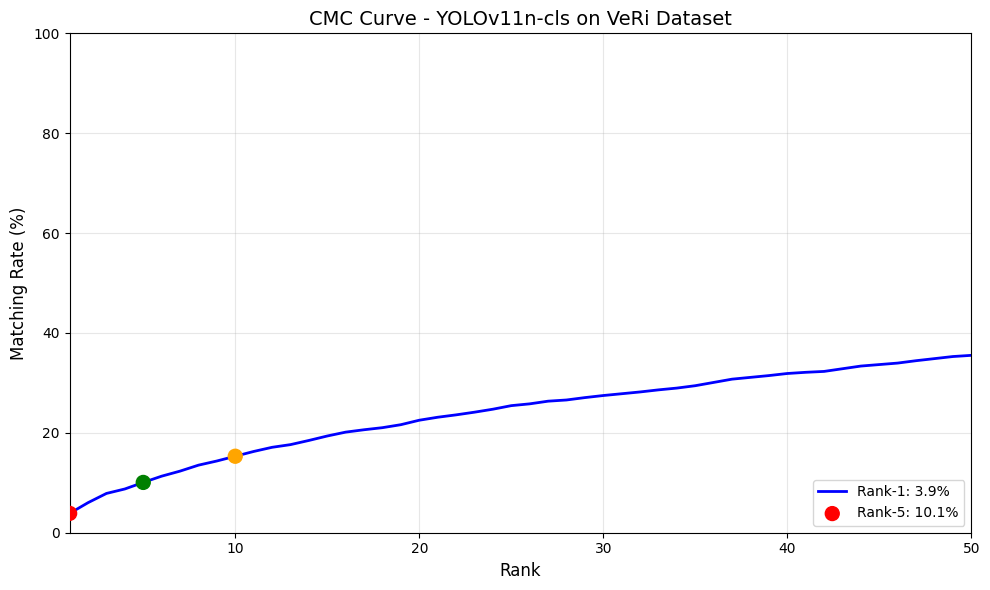


📈 CMC curve saved: /content/cmc_curve.png


In [ ]:
"""
ReID evaluate
"""

import os
import numpy as np
import torch
from PIL import Image
from torchvision import transforms
from ultralytics import YOLO
from tqdm import tqdm
import matplotlib.pyplot as plt

# ==========================
# CONFIG
# ==========================
VERI_DIR = "/content/veri-vehicle-re-identification-dataset/VeRi"
MODEL_PATH = "/content/runs/classify/train/weights/best.pt"
DEVICE = "cuda" if torch. cuda.is_available() else "cpu"

# ==========================
# FUNCTIONS
# ==========================
def parse_filename(filename):
    parts = filename.split('_')
    vehicle_id = int(parts[0])
    camera_id = int(parts[1][1:])
    return vehicle_id, camera_id

def extract_features(model, image_dir):
    transform = transforms.Compose([
        transforms. Resize((224, 224)),
        transforms.ToTensor(),
        transforms. Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    features, labels, cam_ids = [], [], []
    image_files = sorted([f for f in os.listdir(image_dir) if f.endswith('.jpg')])

    print(f"   📷 Processing {len(image_files)} images...")

    batch_size = 32
    for i in tqdm(range(0, len(image_files), batch_size), desc="   Extracting"):
        batch_files = image_files[i:i+batch_size]
        batch_images, batch_labels, batch_cams = [], [], []

        for img_name in batch_files:
            try:
                vid, cid = parse_filename(img_name)
                img = Image.open(os.path.join(image_dir, img_name)). convert('RGB')
                batch_images.append(transform(img))
                batch_labels.append(vid)
                batch_cams.append(cid)
            except Exception as e:
                continue

        if len(batch_images) == 0:
            continue

        labels.extend(batch_labels)
        cam_ids. extend(batch_cams)

        batch_tensor = torch.stack(batch_images). to(DEVICE)

        with torch.no_grad():
            results = model(batch_tensor, verbose=False)
            for result in results:
                features.append(result. probs. data.cpu().numpy())

    return np.array(features), np. array(labels), np.array(cam_ids)

def compute_metrics(q_feat, q_labels, q_cams, g_feat, g_labels, g_cams):
    # Normalize
    q_feat = q_feat / (np.linalg.norm(q_feat, axis=1, keepdims=True) + 1e-8)
    g_feat = g_feat / (np.linalg.norm(g_feat, axis=1, keepdims=True) + 1e-8)

    # Distance matrix
    dist = 1 - np. dot(q_feat, g_feat. T)

    all_AP, all_cmc = [], np.zeros(50)
    num_valid = 0

    for i in range(len(q_labels)):
        q_label, q_cam = q_labels[i], q_cams[i]

        order = np.argsort(dist[i])
        sorted_labels = g_labels[order]
        sorted_cams = g_cams[order]

        # Remove junk
        keep = ~((sorted_labels == q_label) & (sorted_cams == q_cam))
        matches = (sorted_labels[keep] == q_label). astype(float)

        if np.sum(matches) == 0:
            continue

        num_valid += 1

        # CMC
        first_match = np.where(matches == 1)[0]
        if len(first_match) > 0 and first_match[0] < 50:
            all_cmc[first_match[0]:] += 1

        # AP
        cumsum = np.cumsum(matches)
        precision = cumsum / (np.arange(len(matches)) + 1)
        AP = np.sum(precision * matches) / np.sum(matches)
        all_AP.append(AP)

    mAP = np. mean(all_AP) * 100
    cmc = all_cmc / num_valid * 100

    return mAP, cmc

# ==========================
# MAIN
# ==========================
print("="*60)
print(" ĐÁNH GIÁ REID MODEL TRÊN VERI DATASET")
print("="*60)

query_dir = os.path.join(VERI_DIR, "image_query")
gallery_dir = os. path.join(VERI_DIR, "image_test")

print(f"\n Model: {MODEL_PATH}")
model = YOLO(MODEL_PATH)
model.to(DEVICE)

# Extract features
print("\n" + "-"*40)
print(" QUERY SET:")
q_feat, q_labels, q_cams = extract_features(model, query_dir)
print(f"    {len(q_labels)} images, {len(set(q_labels))} vehicles")

print("\n" + "-"*40)
print(" GALLERY SET:")
g_feat, g_labels, g_cams = extract_features(model, gallery_dir)
print(f"    {len(g_labels)} images, {len(set(g_labels))} vehicles")

# Compute metrics
print("\n" + "-"*40)
print(" Computing metrics...")
mAP, cmc = compute_metrics(q_feat, q_labels, q_cams, g_feat, g_labels, g_cams)

# Results
print("\n" + "="*60)
print(" KẾT QUẢ REID METRICS")
print("="*60)
print(f"   mAP:      {mAP:.2f}%")
print(f"   Rank-1:   {cmc[0]:.2f}%")
print(f"   Rank-5:   {cmc[4]:.2f}%")
print(f"   Rank-10:  {cmc[9]:.2f}%")
print(f"   Rank-20:  {cmc[19]:.2f}%")
print("="*60)

# Plot CMC
plt.figure(figsize=(10, 6))
plt. plot(range(1, 51), cmc, 'b-', linewidth=2)
plt.xlabel('Rank', fontsize=12)
plt.ylabel('Matching Rate (%)', fontsize=12)
plt. title('CMC Curve - YOLOv11n-cls on VeRi Dataset', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xlim([1, 50])
plt.ylim([0, 100])
plt.scatter([1, 5, 10], [cmc[0], cmc[4], cmc[9]], color=['red', 'green', 'orange'], s=100, zorder=5)
plt.legend([f'Rank-1: {cmc[0]:.1f}%', f'Rank-5: {cmc[4]:.1f}%', f'Rank-10: {cmc[9]:.1f}%'], loc='lower right')
plt. tight_layout()
plt.savefig('/content/cmc_curve.png', dpi=150)
plt.show()

print(f"\nCMC curve saved: /content/cmc_curve.png")

In [ ]:
import os

query_dir = "/content/veri-vehicle-re-identification-dataset/VeRi/image_test"

print(f"   Kiểm tra: {query_dir}")
print(f"   Tồn tại: {os.path. exists(query_dir)}")

# Liệt kê tất cả files
all_files = os. listdir(query_dir)
print(f"   Tổng files: {len(all_files)}")

# Hiện 10 file đầu
print(f"   10 file đầu tiên:")
for f in all_files[:10]:
    print(f"      '{f}'")

# Kiểm tra extension
jpg_files = [f for f in all_files if f.endswith('.jpg')]
JPG_files = [f for f in all_files if f. endswith('.JPG')]
jpeg_files = [f for f in all_files if f.endswith('.jpeg')]

print(f"\n   . jpg files: {len(jpg_files)}")
print(f"   .JPG files: {len(JPG_files)}")
print(f"   .jpeg files: {len(jpeg_files)}")

📂 Kiểm tra: /content/veri-vehicle-re-identification-dataset/VeRi/image_test
   Tồn tại: True
   Tổng files: 11579
   10 file đầu tiên:
      '0318_c012_00024130_0.jpg'
      '0344_c015_00035840_0.jpg'
      '0609_c004_00042270_0.jpg'
      '0295_c015_00036590_0.jpg'
      '0030_c005_00051660_1.jpg'
      '0005_c007_00078465_0.jpg'
      '0318_c016_00022080_0.jpg'
      '0207_c019_00019450_0.jpg'
      '0144_c015_00024595_0.jpg'
      '0489_c002_00076105_0.jpg'

   . jpg files: 11579
   .JPG files: 0
   .jpeg files: 0
